<Figure size 1200x600 with 0 Axes>

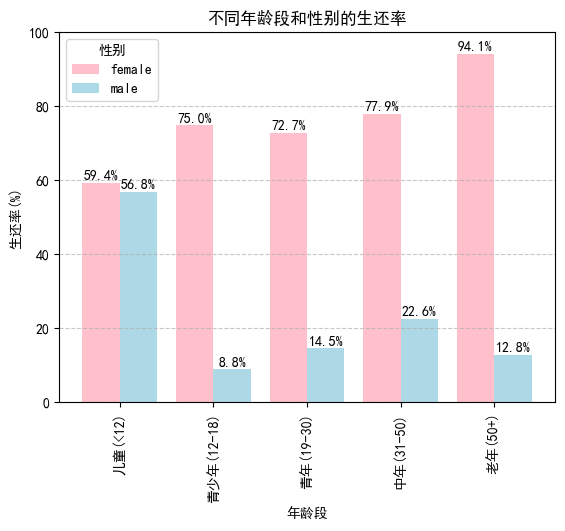

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取数据
data = pd.read_csv(r'C:\Users\FeatherWounds\OneDrive\桌面\exercise_data\train.csv')

data['Age'] = data['Age'].fillna(data['Age'].median())

data['AgeGroup'] = pd.cut(data['Age'], 
                         bins=[0, 12, 18, 30, 50, 80], 
                         labels=['儿童(<12)', '青少年(12-18)', '青年(19-30)', '中年(31-50)', '老年(50+)'])

# 计算各年龄性别组的生还率
age_gender_survival = data.groupby(['AgeGroup', 'Sex'], observed=True)['Survived'].mean().unstack() * 100

# 绘制堆叠柱状图
plt.figure(figsize=(12, 6))
age_gender_survival.plot(kind='bar', stacked=False, color=['pink', 'lightblue'], width=0.8)
plt.title('不同年龄段和性别的生还率')
plt.xlabel('年龄段')
plt.ylabel('生还率(%)')
plt.ylim(0, 100)
plt.legend(title='性别')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 添加数据标签
for p in plt.gca().patches:
    height = p.get_height()
    if not np.isnan(height):
        plt.gca().annotate(f'{height:.1f}%', 
                          (p.get_x() + p.get_width() / 2., height), 
                          ha='center', va='center', 
                          xytext=(0, 5), 
                          textcoords='offset points')
plt.show()